In [ ]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

In [ ]:
a = pd.read_table("/hdd/Correlation_Disance/distance_renew/chr07_distance_renew.csv", sep = ',')

In [5]:
a.head()

,Unnamed: 0,Unnamed: 0.1,from,to,distance
0,0,0,LOC105375112,LOC105375112,-6373.0
1,1,0,LOC105375112,LOC105375113,32869.0
2,2,0,LOC105375112,LOC105375114,74946.0
3,3,0,LOC105375112,LOC102723672,106504.0
4,4,0,LOC105375112,LOC105375118,291687.0


In [6]:
l1k_dis = a[(a.distance < 1000) & (a.distance > -1000)]

In [ ]:
l1k_dis.count()

In [ ]:
x = pd.read_table("/hdd/Correlation_Disance/corr_colon_normal.csv", sep = ',')

In [ ]:
x.index.name = ''
a.index.name = ''

In [ ]:
a = a.drop('Unnamed: 0', axis = 1)
a = a.drop('Unnamed: 0.1', axis = 1)

In [ ]:
a.head()

In [ ]:
x = x.rename_axis(None).rename_axis(None, axis=1)
x = x.stack().reset_index()

In [ ]:
x.to_csv('/hdd/Correlation_Disance/corr_stack.csv', sep = ',', header = True, index = False)

# 새로 불러오기

In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
x = pd.read_table('/hdd/Correlation_Disance/corr_stack.csv', sep = ',')
a = pd.read_table("/hdd/Correlation_Disance/distance_renew/chr07_distance_renew.csv", sep = ',')

In [3]:
x.columns = ['from', 'to', 'corr']

In [ ]:
x.head()

In [7]:
test = pd.merge(l1k_dis, x, on = ['from', 'to'], how = 'left')

In [8]:
test.count()

Unnamed: 0      417
Unnamed: 0.1    417
from            417
to              417
distance        417
corr            110
dtype: int64

In [9]:
test.head()

,Unnamed: 0,Unnamed: 0.1,from,to,distance,corr
0,6508,0,LOC102723672,LOC100507642,279.0,NaN
1,13981,0,PDGFA,HRAT92,-278.0,NaN
2,17711,0,PRKAR1B,DNAAF5,-976.0,NaN
3,22398,0,MIR339,MIR339,-94.0,NaN
4,27021,0,ZFAND2A,LOC101927021,154.0,NaN


In [10]:
test_1 = test.dropna(axis = 0, how = 'any')

In [ ]:
test_1 = test_1.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [11]:
test_1.count()

Unnamed: 0      110
Unnamed: 0.1    110
from            110
to              110
distance        110
corr            110
dtype: int64

In [12]:
test_1.index.name = ''

In [13]:
test_1.reset_index(drop = True, inplace = True)

In [14]:
test_1.head()

,Unnamed: 0,Unnamed: 0.1,from,to,distance,corr
0,51100,0,SNX8,EIF3B,58.0,0.491274
1,104195,0,PMS2,AIMP2,134.0,0.487260
2,176066,0,ANKMY2,BZW2,316.0,0.144565
3,198162,0,FERD3L,FERD3L,-640.0,1.000000
4,265365,0,HNRNPA2B1,CBX3,417.0,0.633891


In [15]:
import matplotlib.pyplot as plt

In [16]:
test_2 = test_1[test_1['corr'] < 1]

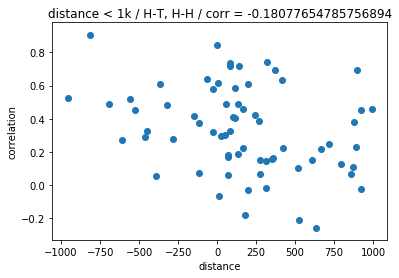

In [80]:
plt.clf()
fig = plt.scatter(test_2['distance'], test_2['corr'], s = None)
plt.title('distance < 1k / H-T, H-H / corr = -0.18077654785756894')
plt.xlabel('distance')
plt.ylabel('correlation')
fig = fig.get_figure()
fig.savefig('/hdd/Correlation_Disance/cor_result_total.pdf')

In [81]:
test_2['distance'].corr(test_2['corr'])

-0.3041188022209475

In [82]:
test_plus = pd.read_table('/hdd/Taemin_before/chr_analysis/head/order_chr7+.txt', delim_whitespace=True, header = 'infer')

In [83]:
test_minus = pd.read_table('/hdd/Taemin_before/chr_analysis/head/order_chr7-.txt', delim_whitespace=True, header = 'infer')

In [84]:
list_of_plus = test_plus['name2'].tolist()
list_of_minus = test_minus['name2'].tolist()

In [85]:
plus_distance = test_2[test_2['from'].isin(list_of_plus)]

In [86]:
minus_distance.count()

Unnamed: 0      53
Unnamed: 0.1    53
from            53
to              53
distance        53
corr            53
dtype: int64

In [87]:
plus_distance.count()

Unnamed: 0      1
Unnamed: 0.1    1
from            1
to              1
distance        1
corr            1
dtype: int64

In [88]:
test_2.count()

Unnamed: 0      68
Unnamed: 0.1    68
from            68
to              68
distance        68
corr            68
dtype: int64

In [89]:
minus_distance = test_2[test_2['from'].isin(list_of_minus)]

In [90]:
plus_head_tail = plus_distance[plus_distance['to'].isin(list_of_plus)]

In [91]:
plus_head_head = plus_distance[plus_distance['to'].isin(list_of_minus)]

In [92]:
minus_head_head = minus_distance[minus_distance['to'].isin(list_of_plus)]

In [93]:
minus_head_tail = minus_distance[minus_distance['to'].isin(list_of_minus)]

In [94]:
plus_head_tail_hi = plus_head_tail[(plus_head_tail['corr'] < -0.4) | (plus_head_tail['corr'] > 0.4)]

In [95]:
plus_head_head_hi = plus_head_head[(plus_head_head['corr'] < -0.4) | (plus_head_head['corr'] > 0.4)]

In [96]:
minus_head_tail_hi = minus_head_tail[(minus_head_tail['corr'] < -0.4) | (minus_head_tail['corr'] > 0.4)]

In [97]:
minus_head_head_hi = minus_head_head[(minus_head_head['corr'] < -0.4) | (minus_head_head['corr'] > 0.4)]

In [98]:
HH = plus_head_head.append(minus_head_head)

In [99]:
TT = plus_head_tail.append(minus_head_tail)

In [55]:
HH_hi = HH[(HH['corr'] < -0.5) | (HH['corr'] > 0.5)]

In [56]:
TT_hi = TT[(TT['corr'] < -0.5) | (TT['corr'] > 0.5)]

In [100]:
HH.count()

Unnamed: 0      42
Unnamed: 0.1    42
from            42
to              42
distance        42
corr            42
dtype: int64

In [101]:
TT.count()

Unnamed: 0      12
Unnamed: 0.1    12
from            12
to              12
distance        12
corr            12
dtype: int64

In [113]:
HH['distance'].corr(HH['corr'])

-0.15686621199426473

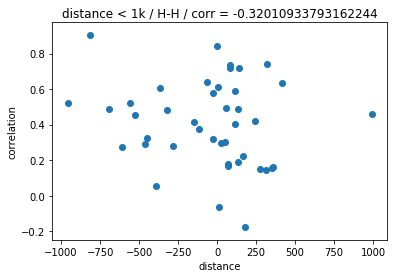

In [114]:
plt.clf()
fig = plt.scatter(HH['distance'], HH['corr'], s = None)
plt.title('distance < 1k / H-H / corr = -0.32010933793162244')
plt.xlabel('distance')
plt.ylabel('correlation')
fig = fig.get_figure()
fig.savefig('/hdd/Correlation_Disance/cor_result_HH_0.5.pdf')

In [107]:
TT['distance'].corr(TT['corr'])

-0.03851083956000197

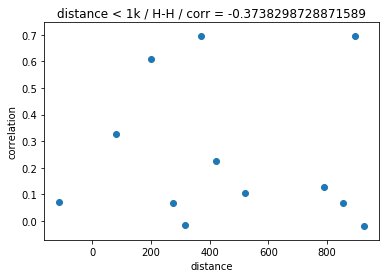

In [108]:
plt.clf()
fig = plt.scatter(TT['distance'], TT['corr'], s = None)
plt.title('distance < 1k / H-H / corr = -0.3738298728871589')
plt.xlabel('distance')
plt.ylabel('correlation')
fig = fig.get_figure()
fig.savefig('/hdd/Correlation_Disance/cor_result_HT_0.5.pdf')

In [ ]:
HH_hi = HH[(HH['corr'] < -0.3) | (HH['corr'] > 0.3)]

In [ ]:
TT_hi = TT[(TT['corr'] < -0.3) | (TT['corr'] > 0.3)]

In [ ]:
HH_hi.count()

In [ ]:
TT_hi.count()

In [ ]:
TT_hi['distance'].corr(TT_hi['corr'])

In [ ]:
HH_hi['distance'].corr(HH_hi['corr'])

In [ ]:
HH.count()

In [ ]:
TT.count()

In [109]:
sense_TT = plus_head_tail[(plus_head_tail['corr'] < -0.4) | (plus_head_tail['corr'] > 0.4)]

In [110]:
anti_TT = minus_head_tail[(minus_head_tail['corr'] < -0.4) | (minus_head_tail['corr'] > 0.4)]

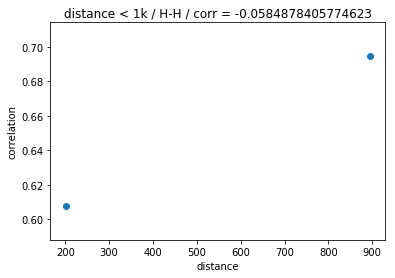

In [111]:
plt.clf()
fig = plt.scatter(anti_TT['distance'], anti_TT['corr'], s = None)
plt.title('distance < 1k / H-H / corr = -0.0584878405774623')
plt.xlabel('distance')
plt.ylabel('correlation')
fig = fig.get_figure()


In [112]:
anti_TT['distance'].corr(anti_TT['corr'])

1.0